In [1]:
import os
from ms2query.utils import load_pickled_file
from matplotlib import pyplot as plt

path_data = "C:\\HSD\\OneDrive - Hochschule Düsseldorf\\Data\\ms2query"


c:\users\flori\.conda\envs\matchms-dev\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
training_scores, training_labels, validation_scores, validation_labels = load_pickled_file(os.path.join(path_data,
                                                                                                        "training_data.pickle"))

In [5]:
training_scores.head()

,precursor_mz*0.001,mass_similarity,s2v_score,ms2ds_score,average_ms2ds_score_for_inchikey14,nr_of_spectra_with_same_inchikey14*0.01,chemical_neighbourhood_score,average_tanimoto_score_for_chemical_neighbourhood_score,nr_of_spectra_for_chemical_neighbourhood_score*0.01
0,0.357206,2.238274e-02,0.342509,0.958357,0.738493,0.02,0.566782,0.830279,0.71
1,0.495381,1.817799e-12,0.120013,0.871954,0.582930,0.23,0.474917,0.914574,4.90
2,0.373165,7.879526e-01,0.234691,0.867854,0.793660,0.04,0.558125,0.739186,0.27
3,0.455290,1.395613e-08,0.082091,0.865033,0.653571,0.50,0.639768,0.880209,0.90
4,0.373165,7.879526e-01,0.280886,0.861416,0.793660,0.04,0.558125,0.739186,0.27


In [6]:
training_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467600 entries, 0 to 467599
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   precursor_mz*0.001                                       467600 non-null  float64
 1   mass_similarity                                          467600 non-null  float64
 2   s2v_score                                                467600 non-null  float64
 3   ms2ds_score                                              467600 non-null  float64
 4   average_ms2ds_score_for_inchikey14                       467600 non-null  float64
 5   nr_of_spectra_with_same_inchikey14*0.01                  467600 non-null  float64
 6   chemical_neighbourhood_score                             467600 non-null  float64
 7   average_tanimoto_score_for_chemical_neighbourhood_score  467600 non-null  float64
 8   nr_of_spectra_f

### Check if the tanimoto score distribution is relatively equal

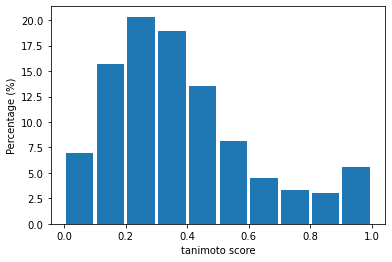

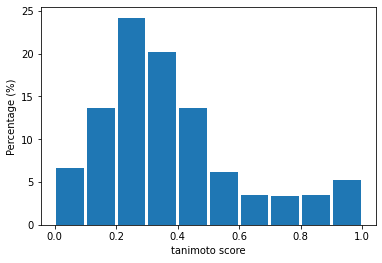

In [3]:
weight_to_convert_to_percentage = 100/len(training_labels)
weights = [weight_to_convert_to_percentage] * len(training_labels)
plt.xlabel("tanimoto score")
plt.ylabel("Percentage (%)")
plt.hist(training_labels, weights = weights, rwidth = 0.9)
plt.show()

weight_to_convert_to_percentage = 100/len(validation_labels)
weights = [weight_to_convert_to_percentage] * len(validation_labels)
plt.xlabel("tanimoto score")
plt.ylabel("Percentage (%)")
plt.hist(validation_labels, weights = weights, rwidth = 0.9)
plt.show()

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below
num_est = 250
rf = RandomForestRegressor(n_estimators = num_est, random_state = 42, max_depth = 5)
rf.fit(training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

C:\Users\flori\AppData\Local\Temp/ipykernel_1944/2016352250.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(training_scores, training_labels)


Training MSE 0.030181185024703003
Validation MSE 0.02890382948325566
Variable: chemical_neighbourhood_score Importance: 0.52
Variable: mass_similarity      Importance: 0.17
Variable: precursor_mz*0.001   Importance: 0.16
Variable: s2v_score            Importance: 0.11
Variable: average_tanimoto_score_for_chemical_neighbourhood_score Importance: 0.02
Variable: ms2ds_score          Importance: 0.01
Variable: average_ms2ds_score_for_inchikey14 Importance: 0.0
Variable: nr_of_spectra_with_same_inchikey14*0.01 Importance: 0.0
Variable: nr_of_spectra_for_chemical_neighbourhood_score*0.01 Importance: 0.0


[None, None, None, None, None, None, None, None, None]

In [9]:
import pickle
pickle.dump(rf, open(os.path.join(path_data,
                                  "library_GNPS_15_12",
                                  "ms2query_random_forest_model.pickle"), "wb"))